# Task 2.3: Fundamentals of Visualization Libraries (Matplotlib Part 1)




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Simulated dataset
np.random.seed(42)
dates = pd.date_range(start="2018-01-01", end="2018-12-31")
temperatures = 10 + 10 * np.sin(np.linspace(0, 3 * np.pi, len(dates))) + np.random.normal(0, 2, len(dates))
bike_rides = (3000 + 1500 * np.sin(np.linspace(0, 3 * np.pi, len(dates))) + np.random.normal(0, 200, len(dates))).astype(int)

df_temp = pd.DataFrame({"date": dates, "avgTemp": temperatures, "bike_rides_daily": bike_rides})
df_temp.head()


,date,avgTemp,bike_rides_daily
0,2018-01-01,10.993428,2919
1,2018-01-02,9.982365,3083
2,2018-01-03,11.812991,3080
3,2018-01-04,13.822046,3135
4,2018-01-05,10.565533,3000


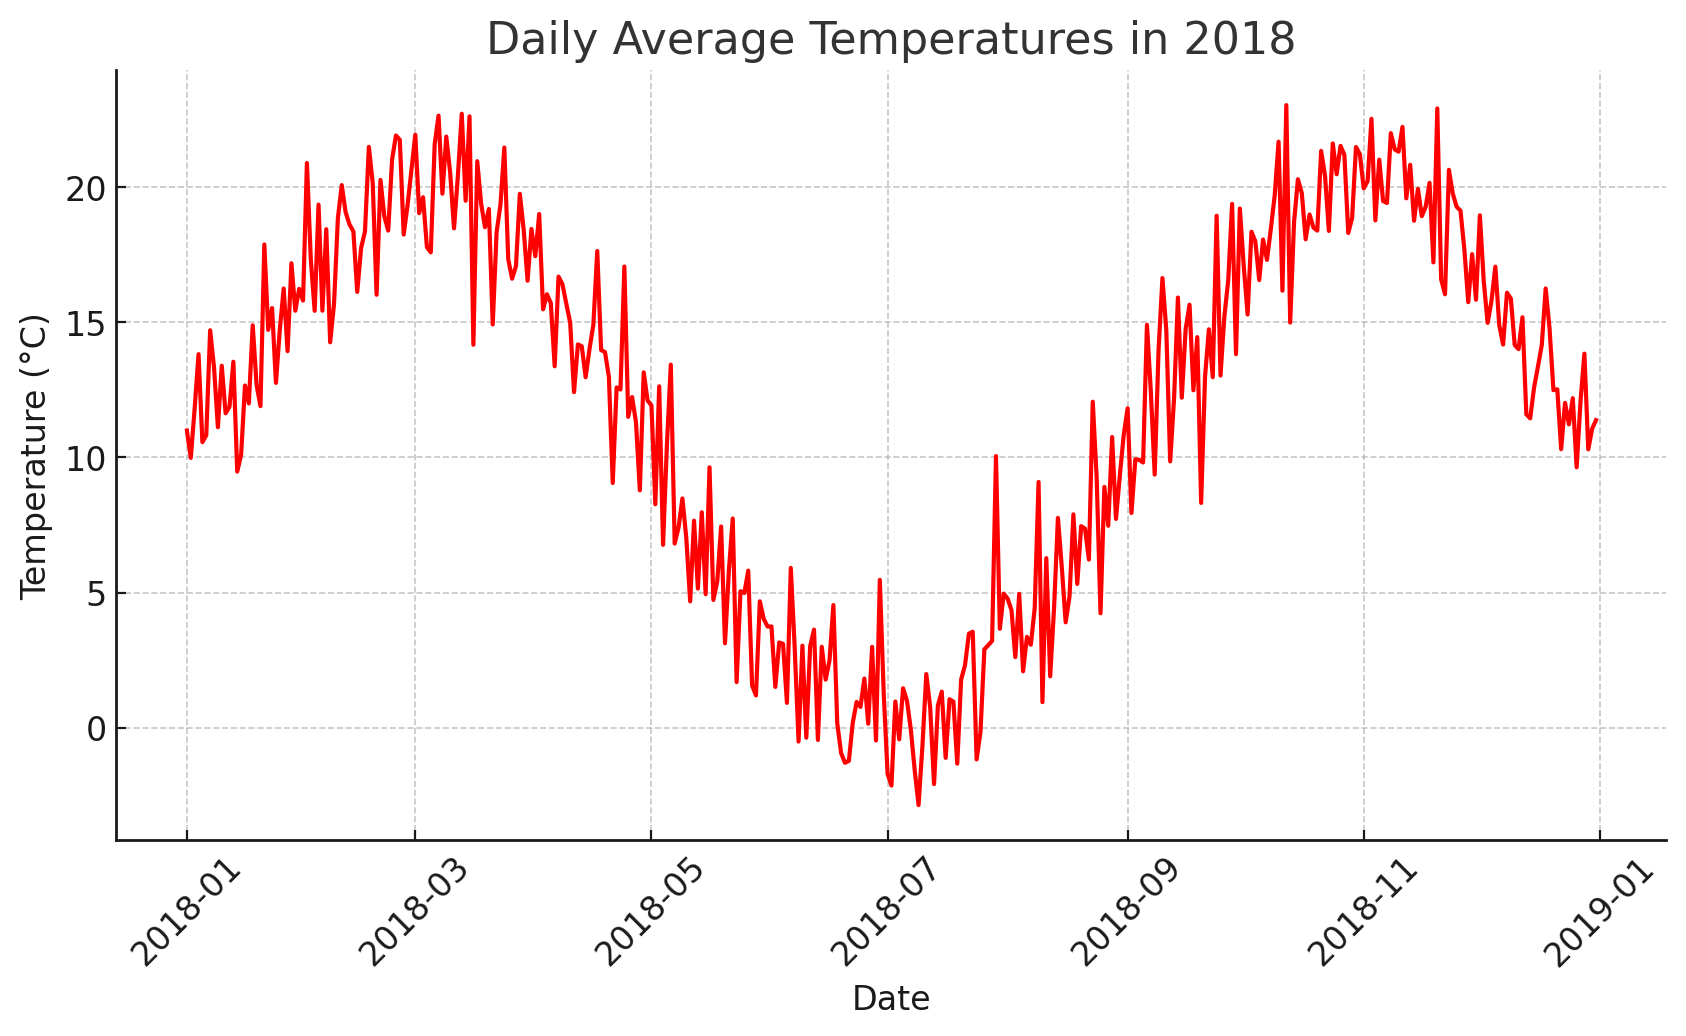

In [2]:
# Time Series Plot of Temperature (Procedural Approach)
plt.figure(figsize=(10,5))
plt.plot(df_temp['date'], df_temp['avgTemp'], color='red')
plt.title('Daily Average Temperatures in 2018')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.show()


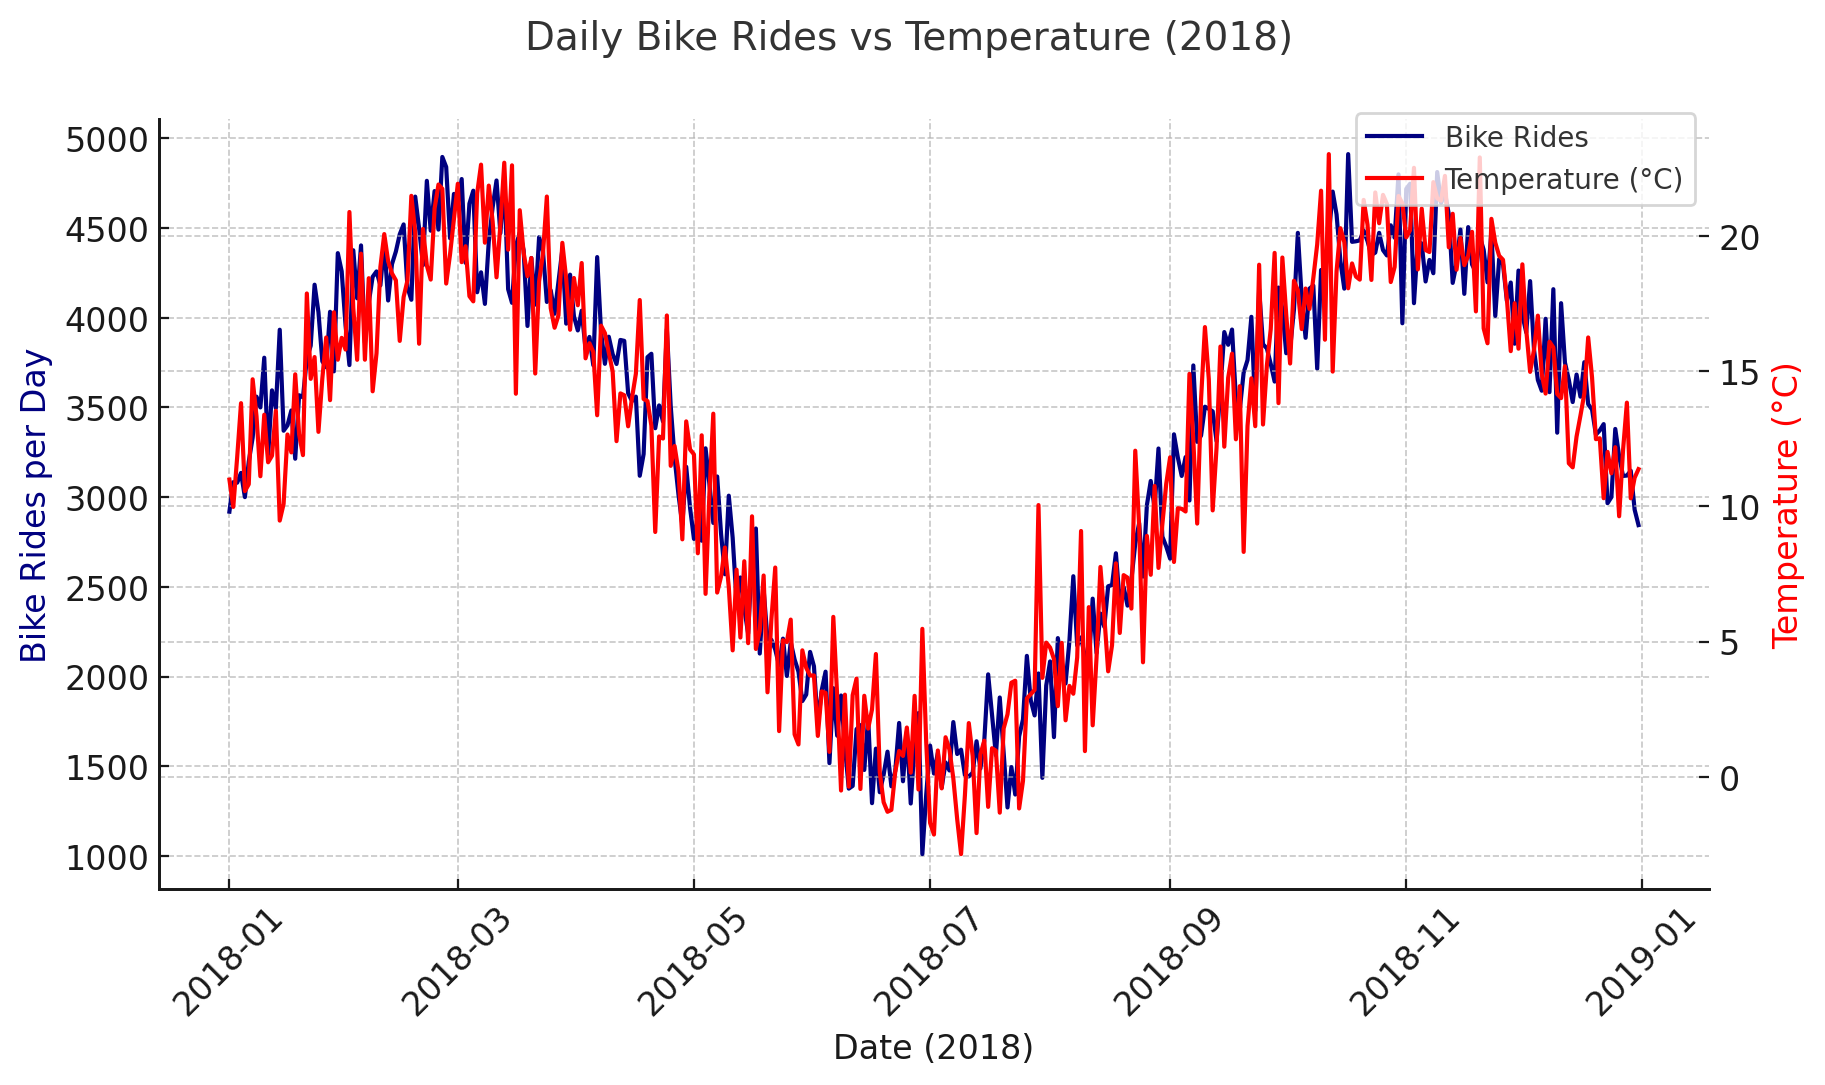

In [3]:
# Dual Axis Plot (Object-Oriented Approach)
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df_temp['date'], df_temp['bike_rides_daily'], color='navy', label='Bike Rides')
ax.set_xlabel('Date (2018)')
ax.set_ylabel('Bike Rides per Day', color='navy')
ax.tick_params(axis='x', rotation=45)

ax2 = ax.twinx()
ax2.plot(df_temp['date'], df_temp['avgTemp'], color='red', label='Temperature (°C)')
ax2.set_ylabel('Temperature (°C)', color='red')

fig.suptitle('Daily Bike Rides vs Temperature (2018)', fontsize=14)
fig.legend(loc='upper right', bbox_to_anchor=(0.9, 0.9))
plt.show()


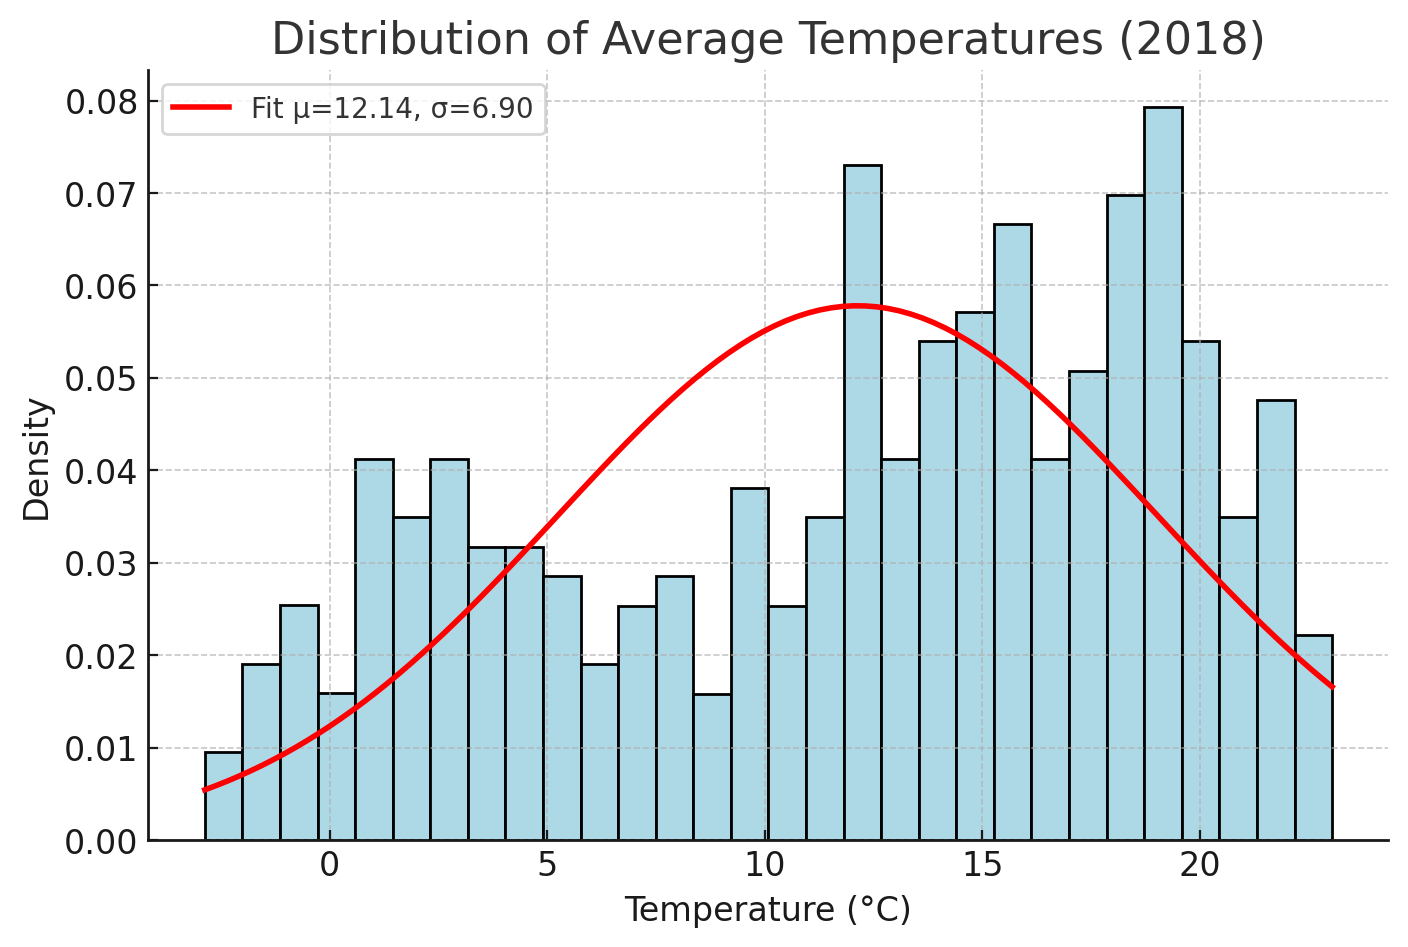

In [4]:
# Histogram with Fitted Curve
plt.figure(figsize=(8,5))
plt.hist(df_temp['avgTemp'], bins=30, color='lightblue', edgecolor='black', density=True)
mu, sigma = norm.fit(df_temp['avgTemp'])
x = np.linspace(df_temp['avgTemp'].min(), df_temp['avgTemp'].max(), 100)
plt.plot(x, norm.pdf(x, mu, sigma), 'r-', linewidth=2, label=f'Fit μ={mu:.2f}, σ={sigma:.2f}')
plt.title('Distribution of Average Temperatures (2018)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Density')
plt.legend()
plt.show()


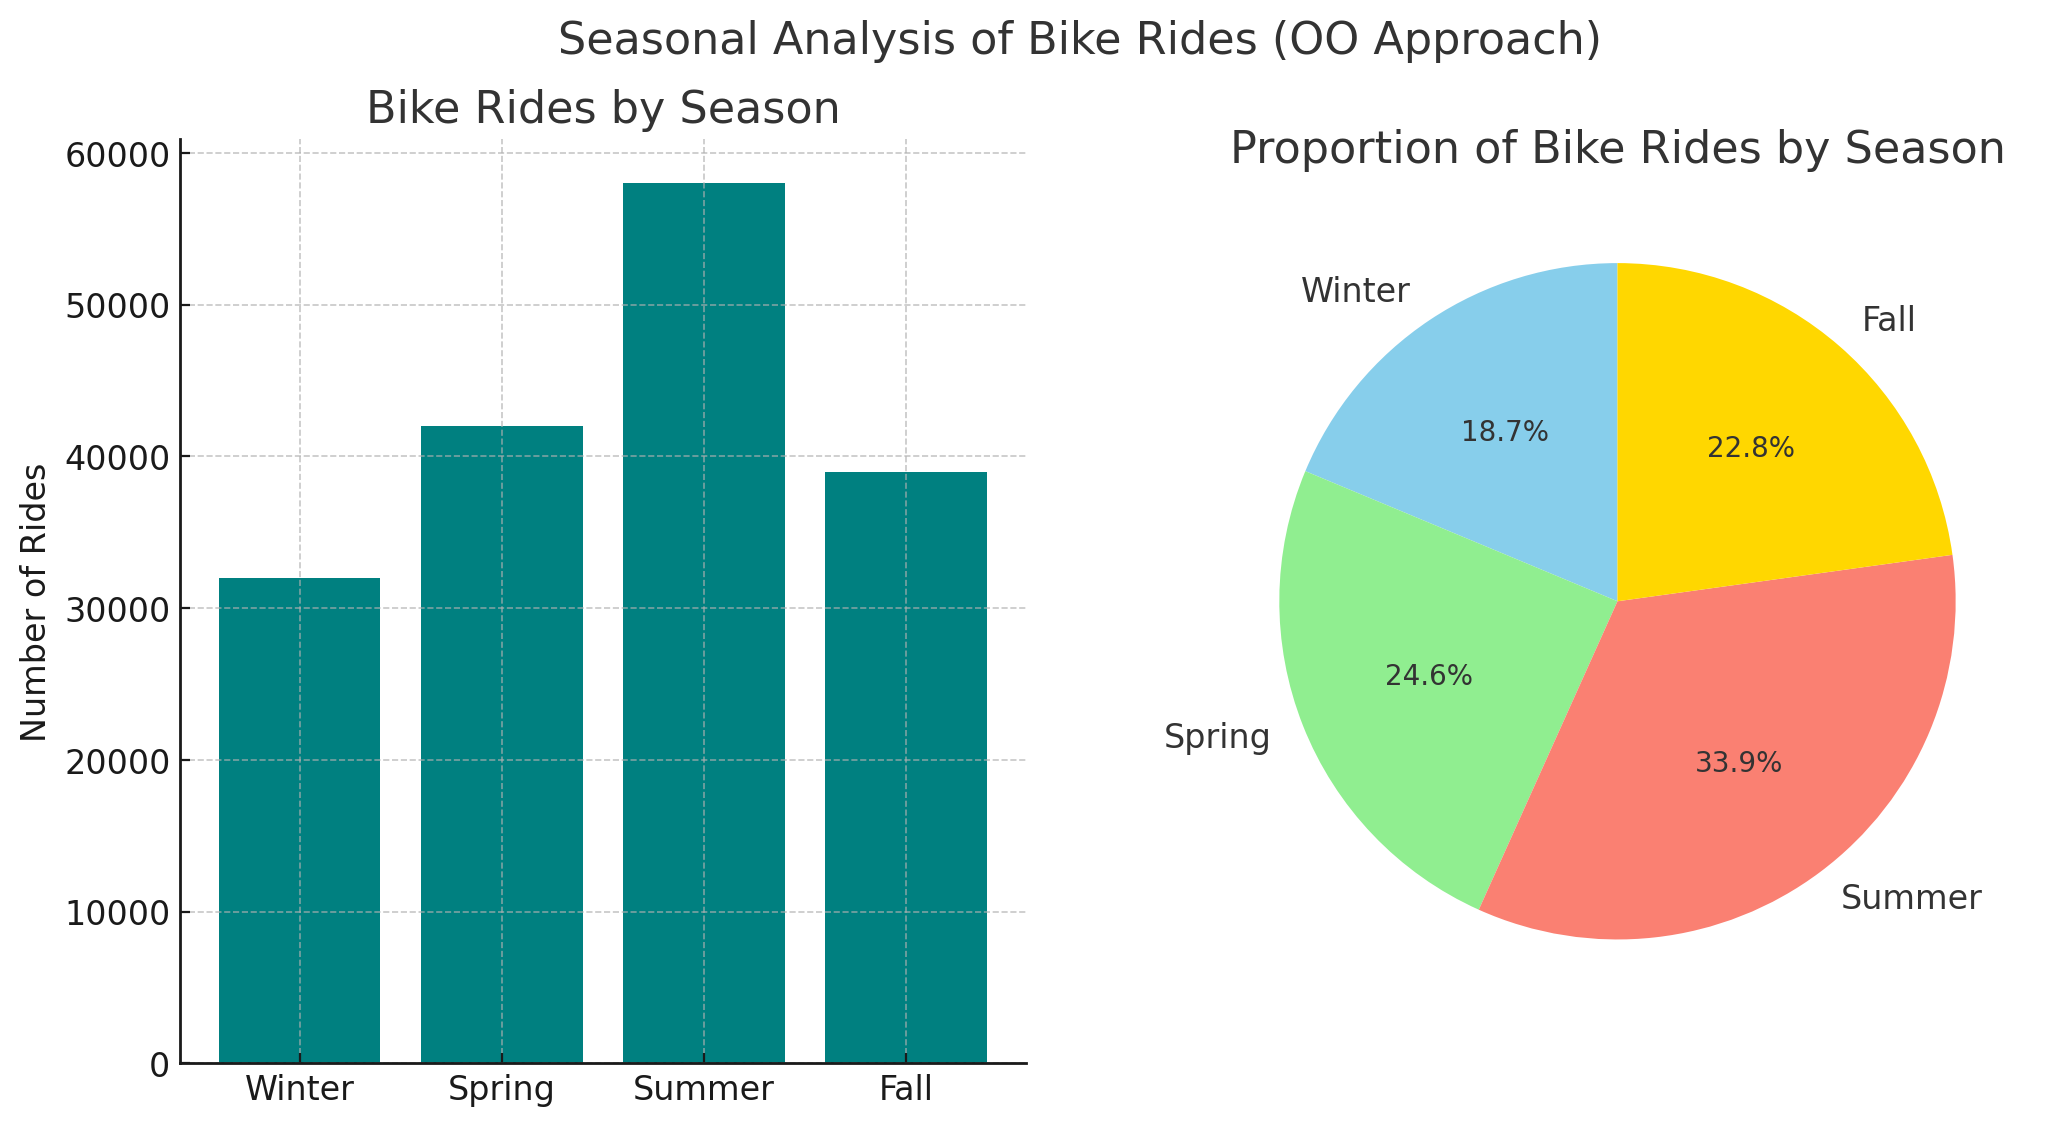

In [5]:
# Subplots: Bar and Pie Chart (OO Approach)
fig, ax = plt.subplots(1, 2, figsize=(12,6))

# Bar chart
seasons = ['Winter', 'Spring', 'Summer', 'Fall']
rides = [32000, 42000, 58000, 39000]
ax[0].bar(seasons, rides, color='teal')
ax[0].set_title('Bike Rides by Season')
ax[0].set_ylabel('Number of Rides')

# Pie chart
ax[1].pie(rides, labels=seasons, autopct='%1.1f%%', startangle=90, colors=['skyblue','lightgreen','salmon','gold'])
ax[1].set_title('Proportion of Bike Rides by Season')

plt.suptitle('Seasonal Analysis of Bike Rides (OO Approach)', fontsize=16)
plt.show()


## Reflection

The dual-axis visualization is particularly helpful for comparing two variables that have different scales but a potential relationship — in this case, temperature and daily bike rides. 

We can observe that as the temperature increases, the number of bike rides also rises, peaking in the summer months and dropping sharply during winter. This suggests a clear correlation between warmer weather and increased cycling activity.

The histogram shows that most temperatures fall between 5°C and 25°C, aligning with the trend of higher ridership in moderate weather. Subplots (bar + pie) provide a clear seasonal breakdown, demonstrating how visualization variety helps interpret trends effectively.
